## Project

    In this project, you will visualize and make calculations from medical examination data using matplotlib, seaborn, and pandas. The dataset values were collected during medical examinations.

### Data description
    The rows in the dataset represent patiets and the columns represent information like body measurements, results from various blood tests, and lifestyle choices. You will use the dataset to exploring the relationship between cardiac disease, body measurements, blood markers, and lifestyle choices.

### Tasks
    Create a chart similar to examples/Figure_1.png, where we show the counts of good and bad outcomes for cholesterol, gluc, alco variable, active, and smoke for patients with cardio=1 and cardio=0 in different panels.

Use the data to complete the following tasks in medical_data_visualizer.py:

* Add an 'overweight' column to the data. To determine if a person is overweight, first calculate their BMI by dividing their weight in kilograms by the square of their height in meters. If that value is > 25 then the person is overweight. Use the value 0 for NOT overweight and the value 1 for overweight.
* Normalize data by making 0 always good and 1 always bad. If the value of 'cholestorol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.
* Convert the data into long format and create a chart that shows the value counts of the categorical features using seaborn's catplot(). The dataset should be split by 'Cardio' so there is one chart for each 'cardio' value. The chart should look like "examples/Figure_1.png".
* Clean the data. Filter out the following patient segments that represent incorrect data:
diastolic pressure is higher then systolic (Keep the correct data with df['ap_lo'] <= df['ap_hi']))
height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))
height is more than the 97.5th percentile
weight is less then the 2.5th percentile
weight is more than the 97.5th percentile
* Create a correlation matrix using the dataset. Plot the correlation matrix using seaborn's heatmap(). Mask the upper triangle

In [10]:
#Answer

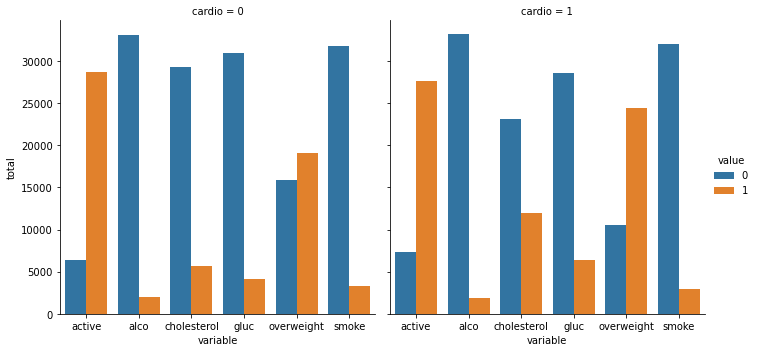

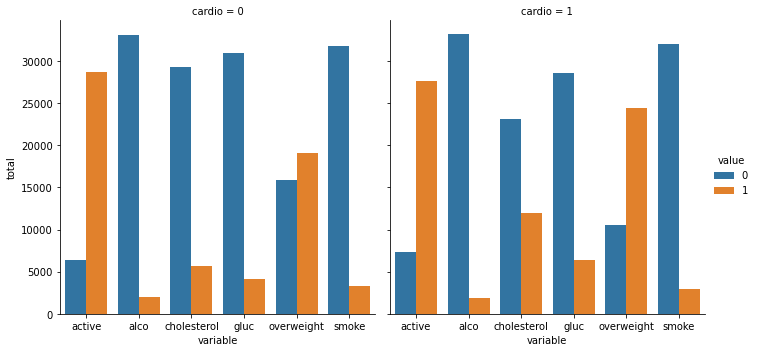

In [11]:
draw_cat_plot()

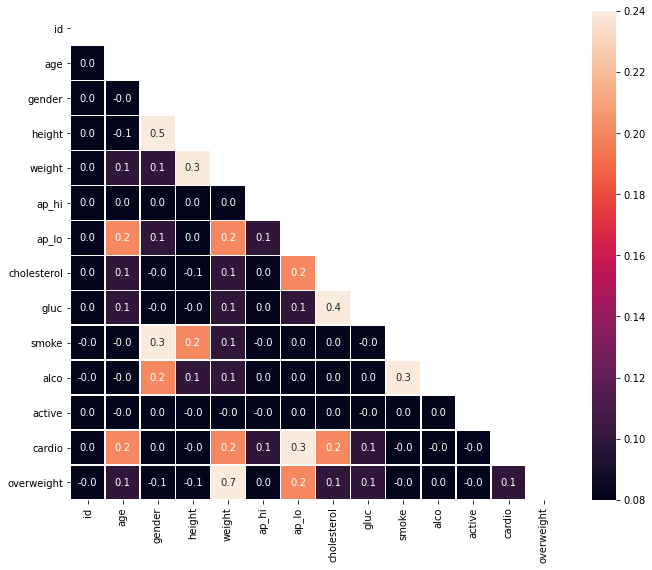

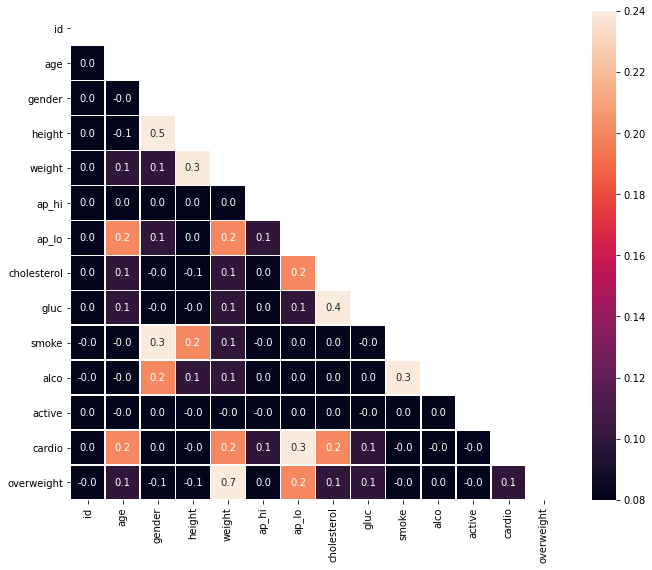

In [12]:
draw_heat_map()

In [9]:
#Solution

In [1]:
# Import Libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Import data
df = pd.read_csv('medical_examination.csv')

In [5]:
# Add 'overweight' column
overweight_list = []

for weight, height in zip(df['weight'], df['height']):
    bmi = weight / ((height/100) ** 2)
    if bmi > 25 :
        overweight_list.append(1)
    else:
        overweight_list.append(0)

df['overweight'] = pd.Series(overweight_list)

In [6]:
# Normalize data by making 0 always good and 1 always bad. If the value of 'cholestorol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.
new_cholesterol = []
for values in df['cholesterol']:
    if values == 1:
        new_cholesterol.append(0)
    else:
        new_cholesterol.append(1)

df['cholesterol'] = pd.Series(new_cholesterol, dtype = int)

new_gluc = []
for values in df['gluc']:
    if values == 1:
        new_gluc.append(0)
    else:
        new_gluc.append(1)

df['gluc'] = pd.Series(new_gluc, dtype = int)

In [7]:
# Draw Categorical Plot
def draw_cat_plot():
    # Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
    df_cat = df.melt(id_vars=['cardio'], value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])
    #This will return a dataframe with three columns: cardio, value and columns

    # Group and reformat the data to split it by 'cardio'. Show the counts of each feature. You will have to rename one of the collumns for the catplot to work correctly.
    #In order to group the data by cardio effectively, we have to group it with variable, and combine the values it using np.aggregate
    #This will give us a clean dataframe separated by cardio, variable, value, and the count for each 1 and 0 in each category.
    df_catplot_group = df_cat.groupby(['cardio', 'variable']).agg({'value' : ['value_counts']}) 

    #For the catplot to work correctly, we need to rename the last column from values value_counts --> total_values
    df_catplot_group.columns = ['total']
    
    #Because we already have the data for our total values, we can now restore the dataframe to its ungrouped version
    df_catplot_group = df_catplot_group.reset_index(level=['cardio', 'variable', 'value'])

    # Draw the catplot with 'sns.catplot()'
    fig = sns.catplot(x='variable', y='total', hue='value', col='cardio', kind='bar', data=df_catplot_group).fig


    # Do not modify the next two lines
    fig.savefig('catplot.png')
    return fig

In [8]:
# Draw Heat Map
def draw_heat_map():
    # Clean the data
    heat_filter = ((df['ap_lo'] <= df['ap_hi']) & (df['height'] >= df['height'].quantile(0.025)) & (df['weight'] >= df['weight'].quantile(0.025))
    & (df['height'] <= df['height'].quantile(0.975)) & (df['weight'] <= df['weight'].quantile(0.975)))

    df_heat = df[heat_filter]

    # Calculate the correlation matrix
    corr = df_heat.corr().round(1)
 
    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Set up the matplotlib figure
    fig = plt.subplots(1,1,figsize=(11, 9))
    
    # Draw the heatmap with 'sns.heatmap()'
    fig = sns.heatmap(corr, annot=True, fmt='.1f', mask=mask, vmax=0.24, vmin=0.08, linewidths=0.5).figure

    # Do not modify the next two lines
    fig.savefig('heatmap.png')
    return fig